In [44]:
import torch
from usta_model import UstaModel
from usta_tokenizer import UstaTokenizer

u_tokenizer = UstaTokenizer("tokenizer.json")

prompt = "the capital of united"

tokens = u_tokenizer.encode(prompt)

torch.manual_seed(1)
u_model = UstaModel(vocab_size=len(u_tokenizer.vocab), embedding_dim=4, context_length=32)

sentence_meanings_with_attention_context = u_model(tokens)
sentence_meanings_with_attention_context

tensor([[-1.5256, -0.7502, -0.6540, -1.6095],
        [-0.2092, -0.2013, -0.7509, -0.0189],
        [ 0.9326, -0.2774,  0.3166, -1.6980],
        [ 0.7698, -0.1935,  0.1223, -0.0585],
        [-0.1228,  0.3777,  1.0470, -0.1133],
        [-0.4315, -0.1780,  0.6491, -0.0958],
        [-0.1496,  1.1284,  0.2814,  1.3386]], grad_fn=<CopySlices>)

In [24]:
from transformers import Gemma3ForCausalLM

gemma_model = Gemma3ForCausalLM.from_pretrained("google/gemma-3-1b-it")
u_model, gemma_model

(UstaModel(
   (embedding): Embedding(64, 4)
   (pos_embedding): Embedding(32, 4)
 ),
 Gemma3ForCausalLM(
   (model): Gemma3TextModel(
     (embed_tokens): Gemma3TextScaledWordEmbedding(262144, 1152, padding_idx=0)
     (layers): ModuleList(
       (0-25): 26 x Gemma3DecoderLayer(
         (self_attn): Gemma3Attention(
           (q_proj): Linear(in_features=1152, out_features=1024, bias=False)
           (k_proj): Linear(in_features=1152, out_features=256, bias=False)
           (v_proj): Linear(in_features=1152, out_features=256, bias=False)
           (o_proj): Linear(in_features=1024, out_features=1152, bias=False)
           (q_norm): Gemma3RMSNorm((256,), eps=1e-06)
           (k_norm): Gemma3RMSNorm((256,), eps=1e-06)
         )
         (mlp): Gemma3MLP(
           (gate_proj): Linear(in_features=1152, out_features=6912, bias=False)
           (up_proj): Linear(in_features=1152, out_features=6912, bias=False)
           (down_proj): Linear(in_features=6912, out_features=1152, b

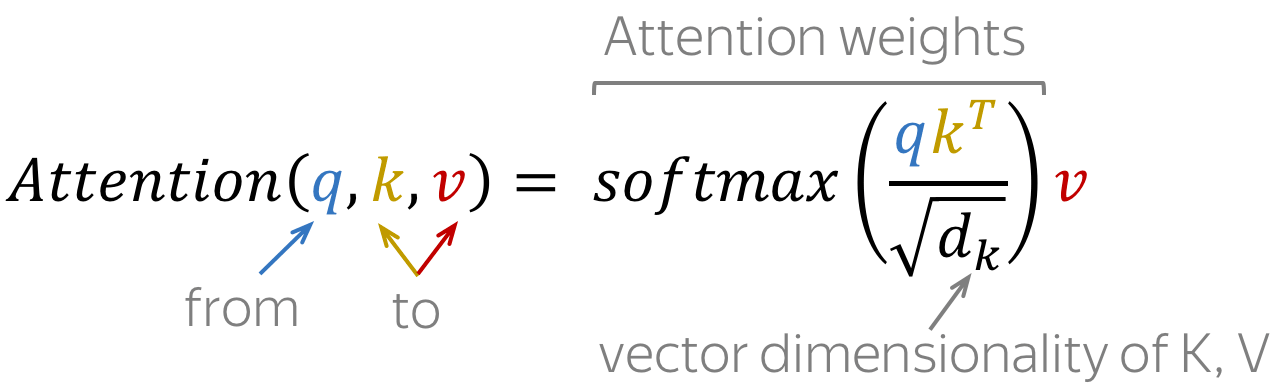

In [45]:
from IPython.display import Image
Image("/Users/gorkemparadise/Desktop/app/LLM/formul.png")

In [46]:
q_weights = torch.nn.Linear(4, 3, bias=False)
k_weights = torch.nn.Linear(4, 3, bias=False)
v_weights = torch.nn.Linear(4, 3, bias=False)

q_of_sentence = q_weights(sentence_meanings_with_atention_context)
k_of_sentence = k_weights(sentence_meanings_with_atention_context)
v_of_sentence = v_weights(sentence_meanings_with_atention_context)
print(q_weights.weight)

q_of_sentence.shape, k_of_sentence.shape, v_of_sentence.shape

Parameter containing:
tensor([[-0.3231,  0.3206,  0.1776,  0.1237],
        [-0.0991, -0.1560,  0.0848,  0.3869],
        [ 0.0716, -0.2364,  0.4967,  0.0107]], requires_grad=True)


(torch.Size([20, 3]), torch.Size([20, 3]), torch.Size([20, 3]))

In [47]:
attention_scores = q_of_sentence @ k_of_sentence.T
attention_weights = torch.softmax(attention_scores / k_of_sentence.shape[-1] ** 0.5, dim=1)

context_vector = attention_scores @ v_of_sentence

In [48]:
from plot_tokens import plot_tokens

u_sentences = [
    {
    "words": q_of_sentence.detach().numpy(),
    "labels": u_tokenizer.tokenize(prompt),
    "color": "blue",
    },
    {
    "words": k_of_sentence.detach().numpy(),
    "labels": u_tokenizer.tokenize(prompt),
    "color": "purple",
    },
    {
    "words": v_of_sentence.detach().numpy(),
    "labels": u_tokenizer.tokenize(prompt),
    "color": "orange",
    },
    {
    "words": context_vector.detach().numpy(),
    "labels": u_tokenizer.tokenize(prompt),
    "color": "green",
    },
]

plot_tokens(u_sentences, "Query, Key, Value and Context Vector Space")

Python(80811) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [29]:
## Causel Self Attention

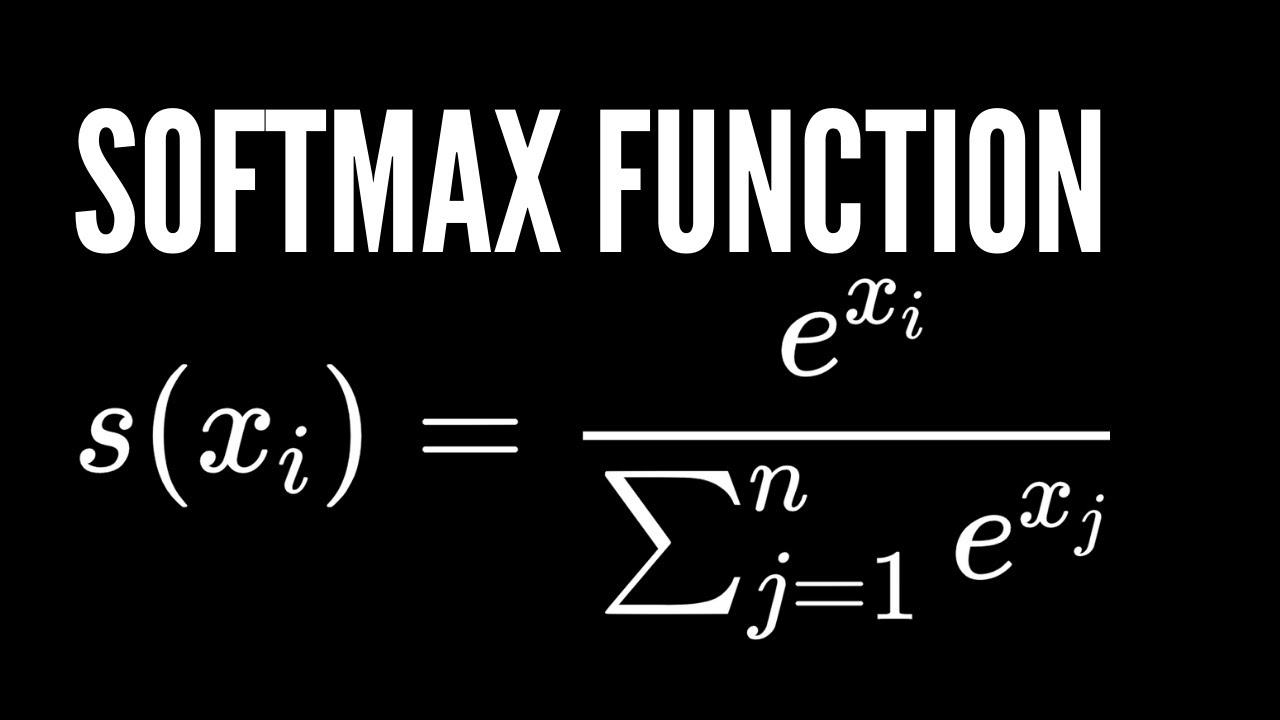

In [35]:
from IPython.display import Image
Image("/Users/gorkemparadise/Desktop/app/LLM/formul2.jpg")

In [49]:
mask = torch.tril(torch.ones(7, 7))
mask

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1.]])

In [50]:
mask = torch.tril(torch.ones(attention_weights.shape[0], attention_weights.shape[0]))
masked_attention_weights = attention_weights.masked_fill(mask == 0, -torch.inf)
torch.softmax(attention_weights * mask, dim=1)

tensor([[0.0518, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499,
         0.0499, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499, 0.0499,
         0.0499, 0.0499],
        [0.0520, 0.0522, 0.0498, 0.0498, 0.0498, 0.0498, 0.0498, 0.0498, 0.0498,
         0.0498, 0.0498, 0.0498, 0.0498, 0.0498, 0.0498, 0.0498, 0.0498, 0.0498,
         0.0498, 0.0498],
        [0.0533, 0.0527, 0.0520, 0.0495, 0.0495, 0.0495, 0.0495, 0.0495, 0.0495,
         0.0495, 0.0495, 0.0495, 0.0495, 0.0495, 0.0495, 0.0495, 0.0495, 0.0495,
         0.0495, 0.0495],
        [0.0530, 0.0522, 0.0520, 0.0518, 0.0494, 0.0494, 0.0494, 0.0494, 0.0494,
         0.0494, 0.0494, 0.0494, 0.0494, 0.0494, 0.0494, 0.0494, 0.0494, 0.0494,
         0.0494, 0.0494],
        [0.0519, 0.0519, 0.0523, 0.0521, 0.0519, 0.0493, 0.0493, 0.0493, 0.0493,
         0.0493, 0.0493, 0.0493, 0.0493, 0.0493, 0.0493, 0.0493, 0.0493, 0.0493,
         0.0493, 0.0493],
        [0.0521, 0.0517, 0.0521, 0.0518, 0.0517, 0.0517, 0.0

In [54]:
dropout_rate = 0.5
torch.manual_seed(1)
dropout = torch.nn.Dropout(dropout_rate)
dropout(softmaxed_attention_weights)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4508, 1.3423, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8985, 0.2959, 0.0581, 0.0000, 0.0000, 0.0000],
        [0.6650, 0.0000, 0.5210, 0.0504, 0.1272, 0.4640, 0.0000],
        [0.0624, 0.2772, 0.0110, 1.4383, 0.0000, 0.0229, 0.1385]])

In [62]:
import usta_causal_attention

import torch
import torch.nn as nn

class UstaMultiHeadAttention(nn.Module):
  def __init__(self, embedding_dim, output_dim, context_length, num_heads, dropout_rate = 0):
    super().__init__()

    self.heads = nn.ModuleList(
      [UstaCausalAttention(embedding_dim, output_dim, context_length, dropout_rate) for _ in range(num_heads)]
    )

  def forward(self, x):
    attention_outs = []
    for head in self.heads:
      head_out = head(x)
      attention_outs.append(head_out)

    return torch.cat(attention_outs, dim=1)
  
multi_head_attention = UstaMultiHeadAttention(4, 4, 32, 2, dropout_rate=0)

out = multi_head_attention(torch.randn(4, 4))
out.shape, out

(torch.Size([4, 8]),
 tensor([[-0.3990,  1.1775, -0.2945,  0.1884,  0.8509, -0.0264,  0.9140, -0.8182],
         [-0.7344,  0.9187, -0.4533,  0.3424,  0.7433,  0.0082,  0.5628, -0.5267],
         [-0.3554,  0.4639, -0.2576,  0.0434,  0.2835, -0.1698,  0.2841, -0.1127],
         [-0.3266,  0.6491, -0.3153,  0.0421,  0.1522, -0.3254,  0.4673, -0.1032]],
        grad_fn=<CatBackward0>))